In [144]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm 


# Example usage
# Assuming you have loaded MNIST data into X_train (images) and y_train (labels)
# You need to preprocess the data (e.g., flatten images and one-hot encode labels) before using it

# train(X_train, y_train, epochs=10, batch_size=64)


In [145]:
train_data_pd = pd.read_csv('./train.csv')
test_data_pd = pd.read_csv('./test.csv')

In [146]:
train_data = np.array(train_data_pd)
test_data = np.array(test_data_pd)

In [147]:
train_label = train_data[:, :1]

train_data = train_data[:, 1:]


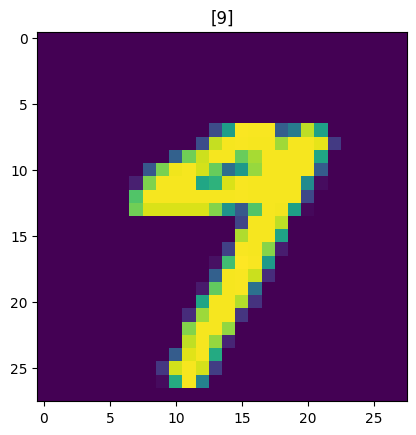

In [148]:
index = 95
plt.title((train_label[index]))
plt.imshow(train_data[index].reshape(28,28))

In [149]:
train_data = train_data/np.max(train_data)
test_data = test_data/np.max(test_data)

In [150]:
print(np.max(train_data))
print(np.max(test_data))

1.0
1.0


In [151]:
train_lables_OH = np.zeros((train_data.shape[0], 10))
train_lables_OH

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [152]:
for i, lable in enumerate(train_label):
    # print(i, lable)
    train_lables_OH[i][lable] = 1


In [153]:
print(train_data.shape)
print(train_lables_OH.shape)

(42000, 784)
(42000, 10)


In [154]:
# Define the ReLU activation function
def relu(x):
    return np.maximum(0, x)

# Define the derivative of the ReLU activation function
def relu_derivative(x):
    return np.where(x > 0, 1, 0)

# Define the softmax function
def softmax(x):
    exp_vals = np.exp(x - np.max(x, axis=-1, keepdims=True))
    return exp_vals / np.sum(exp_vals, axis=-1, keepdims=True)

# Define the categorical cross-entropy loss function
def categorical_cross_entropy(y_pred, y_true):
    num_samples = y_pred.shape[0]
    return -np.sum(y_true * np.log(y_pred + 1e-15)) / num_samples


In [155]:
# Initialize weights and biases
input_size = 784  # MNIST image size (28x28)
hidden_size = 128
output_size = 10
learning_rate = 0.001

W1 = np.random.randn(input_size, hidden_size)
b1 = np.zeros(hidden_size)
W2 = np.random.randn(hidden_size, output_size)
b2 = np.zeros(output_size)

In [156]:
# Forward pass
def forward_pass(X):
    global W1, b1, W2, b2
    # Input layer to hidden layer
    z1 = np.dot(X, W1) + b1
    a1 = relu(z1)
    # Hidden layer to output layer
    z2 = np.dot(a1, W2) + b2
    a2 = softmax(z2)
    return a1, a2

# Backward pass
def backward_pass(X, y_true, a1, a2):
    global W1, b1, W2, b2
    num_samples = X.shape[0]
    # Compute gradients for output layer
    dz2 = (a2 - y_true) / num_samples
    dW2 = np.dot(a1.T, dz2)
    db2 = np.sum(dz2, axis=0)
    # Compute gradients for hidden layer
    da1 = np.dot(dz2, W2.T)
    dz1 = da1 * relu_derivative(a1)
    dW1 = np.dot(X.T, dz1)
    db1 = np.sum(dz1, axis=0)
    # Update weights and biases
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2


In [157]:
# Training loop
def train(X_train, y_train, epochs, batch_size):
    num_samples = X_train.shape[0]
    for epoch in range(epochs):
        for i in range(0, num_samples, batch_size):
            X_batch = X_train[i:i+batch_size]
            y_batch = y_train[i:i+batch_size]
            # Forward pass
            a1, a2 = forward_pass(X_batch)
            # Backward pass
            backward_pass(X_batch, y_batch, a1, a2)
        # Compute training loss
        _, y_pred = forward_pass(X_train)
        loss = categorical_cross_entropy(y_pred, y_train)
        print(f'Epoch {epoch+1}/{epochs}, Loss: {loss:.4f}')


In [166]:
train(train_data, train_lables_OH, epochs=500, batch_size=256)

Epoch 1/500, Loss: 1.3683
Epoch 2/500, Loss: 1.3656
Epoch 3/500, Loss: 1.3629
Epoch 4/500, Loss: 1.3603
Epoch 5/500, Loss: 1.3576
Epoch 6/500, Loss: 1.3550
Epoch 7/500, Loss: 1.3523
Epoch 8/500, Loss: 1.3497
Epoch 9/500, Loss: 1.3471
Epoch 10/500, Loss: 1.3445
Epoch 11/500, Loss: 1.3419
Epoch 12/500, Loss: 1.3393
Epoch 13/500, Loss: 1.3367
Epoch 14/500, Loss: 1.3342
Epoch 15/500, Loss: 1.3316
Epoch 16/500, Loss: 1.3291
Epoch 17/500, Loss: 1.3266
Epoch 18/500, Loss: 1.3240
Epoch 19/500, Loss: 1.3215
Epoch 20/500, Loss: 1.3190
Epoch 21/500, Loss: 1.3165
Epoch 22/500, Loss: 1.3141
Epoch 23/500, Loss: 1.3116
Epoch 24/500, Loss: 1.3091
Epoch 25/500, Loss: 1.3067
Epoch 26/500, Loss: 1.3042
Epoch 27/500, Loss: 1.3018
Epoch 28/500, Loss: 1.2993
Epoch 29/500, Loss: 1.2969
Epoch 30/500, Loss: 1.2945
Epoch 31/500, Loss: 1.2921
Epoch 32/500, Loss: 1.2897
Epoch 33/500, Loss: 1.2873
Epoch 34/500, Loss: 1.2850
Epoch 35/500, Loss: 1.2826
Epoch 36/500, Loss: 1.2803
Epoch 37/500, Loss: 1.2779
Epoch 38/5

Predicted value 7


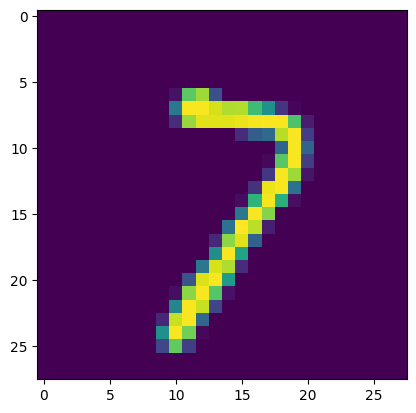

In [175]:
index = 40
test_ele = test_data[index: index+1, :]
plt.imshow(test_ele.reshape(28,28))
_, y_pred = forward_pass(test_ele)
print('Predicted value', np.argmax(y_pred))